In [1]:
from sqlalchemy.engine import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import text

In [2]:
db_user = 'root'
db_password = 'rushi12345'
db_host = '192.168.29.7'
db_name = 'data_prac_db' 

engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}")
SessionLocal = sessionmaker(autoflush=True, bind=engine)

In [3]:
db = SessionLocal()

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("Datasets/SCMS_Delivery_History_Dataset.csv")

In [5]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,1138

df.to_sql(name="supply_chain", con=engine, index=False)

In [6]:
db.execute(text("""
show tables;
""")).fetchall()

[('bank_details',), ('bank_view',), ('dress_data',), ('supply_chain',)]

In [7]:
db.execute(text("""
select * from supply_chain limit 3;
""")).fetchall()

[(1, '100-CI-T01', 'Pre-PQ Process', 'SCMS-4', 'ASN-8', "Côte d'Ivoire", 'PMO - US', 'Direct Drop', 'EXW', 'Air', 'Pre-PQ Process', 'Date Not Captured', '2-Jun-06', datetime.date(2006, 6, 2), '2-Jun-06', datetime.date(2006, 6, 2), '2-Jun-06', datetime.date(2006, 6, 2), None, None, None, 'HRDT', 'HIV test', 'RANBAXY Fine Chemicals LTD.', 'HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests', 'HIV, Reveal G3 Rapid HIV-1 Antibody Test', 'Reveal', None, 'Test kit', 30, 19, 551.0, 29.0, 0.97, 'Ranbaxy Fine Chemicals LTD', 'Yes', '13', '780.34', None),
 (3, '108-VN-T01', 'Pre-PQ Process', 'SCMS-13', 'ASN-85', 'Vietnam', 'PMO - US', 'Direct Drop', 'EXW', 'Air', 'Pre-PQ Process', 'Date Not Captured', '14-Nov-06', datetime.date(2006, 11, 14), '14-Nov-06', datetime.date(2006, 11, 14), '14-Nov-06', datetime.date(2006, 11, 14), None, None, None, 'ARV', 'Pediatric', 'Aurobindo Pharma Limited', 'Nevirapine 10mg/ml, oral suspension, Bottle, 240 ml', 'Nevirapine', 'Generic', '10mg/ml', 'Oral suspension

In [8]:
db.execute(text("""
select * from supply_chain limit 10;
""")).keys()

RMKeyView(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Schedule Delivery Date New', 'Delivered to Client Date', 'Delivered to Client Date New', 'Delivery Recorded Date', 'Delivery Recorded Date New', 'delivery_recorded_day', 'delivery_recorded_month', 'delivery_recorded_year', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)'])

In [9]:
db.execute(text("""
SELECT str_to_date(`Scheduled Delivery Date`, '%d-%b-%y') FROM supply_chain limit 5;
""")).fetchall()

[(datetime.date(2006, 6, 2),),
 (datetime.date(2006, 11, 14),),
 (datetime.date(2006, 8, 27),),
 (datetime.date(2006, 9, 1),),
 (datetime.date(2006, 8, 11),)]

In [23]:
db.execute(text("""
alter table supply_chain
add column `Schedule Delivery Date New` date after `Scheduled Delivery Date`
"""))

In [26]:
db.execute(text("""
select * from supply_chain limit 1;
""")).fetchall()

[(1, '100-CI-T01', 'Pre-PQ Process', 'SCMS-4', 'ASN-8', "Côte d'Ivoire", 'PMO - US', 'Direct Drop', 'EXW', 'Air', 'Pre-PQ Process', 'Date Not Captured', '2-Jun-06', None, '2-Jun-06', '2-Jun-06', 'HRDT', 'HIV test', 'RANBAXY Fine Chemicals LTD.', 'HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests', 'HIV, Reveal G3 Rapid HIV-1 Antibody Test', 'Reveal', None, 'Test kit', 30, 19, 551.0, 29.0, 0.97, 'Ranbaxy Fine Chemicals LTD', 'Yes', '13', '780.34', None)]

In [27]:
db.execute(text("""
update supply_chain
set `Schedule Delivery Date New` = str_to_date(`Scheduled Delivery Date`, '%d-%b-%y') 
"""))

In [30]:
db.execute(text("""
select `Scheduled Delivery Date`, `Schedule Delivery Date New` from supply_chain limit 5;
""")).fetchall()

[('2-Jun-06', datetime.date(2006, 6, 2)),
 ('14-Nov-06', datetime.date(2006, 11, 14)),
 ('27-Aug-06', datetime.date(2006, 8, 27)),
 ('1-Sep-06', datetime.date(2006, 9, 1)),
 ('11-Aug-06', datetime.date(2006, 8, 11))]

In [40]:
db.execute(text("""
select * from supply_chain limit 5
""")).keys()

RMKeyView(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Schedule Delivery Date New', 'Delivered to Client Date', 'Delivered to Client Date New', 'Delivery Recorded Date', 'Delivery Recorded Date New', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)'])

In [33]:
db.execute(text("""
alter table supply_chain
add column `Delivered to Client Date New` date after `Delivered to Client Date`
"""))

In [34]:
db.execute(text("""
update supply_chain
set `Delivered to Client Date New` = str_to_date(`Delivered to Client Date`, "%d-%b-%y")
"""))

In [8]:
pd.DataFrame(db.execute(text("""
select `Delivered to Client Date New` from supply_chain limit 10; 
""")).fetchall())

,Delivered to Client Date New
0,2006-06-02
1,2006-11-14
2,2006-08-27
3,2006-09-01
4,2006-08-11
5,2006-09-28
6,2007-01-08
7,2006-11-24
8,2006-12-07
9,2007-01-30


In [15]:
db.execute(text("""
update supply_chain
set `Delivery Recorded Date New` = str_to_date(`Delivery Recorded Date`, "%d-%b-%y")
"""))

In [10]:
db.execute(text("""
select * from supply_chain limit 1;
""")).fetchall()

[(1, '100-CI-T01', 'Pre-PQ Process', 'SCMS-4', 'ASN-8', "Côte d'Ivoire", 'PMO - US', 'Direct Drop', 'EXW', 'Air', 'Pre-PQ Process', 'Date Not Captured', '2-Jun-06', datetime.date(2006, 6, 2), '2-Jun-06', datetime.date(2006, 6, 2), '2-Jun-06', datetime.date(2006, 6, 2), 'HRDT', 'HIV test', 'RANBAXY Fine Chemicals LTD.', 'HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests', 'HIV, Reveal G3 Rapid HIV-1 Antibody Test', 'Reveal', None, 'Test kit', 30, 19, 551.0, 29.0, 0.97, 'Ranbaxy Fine Chemicals LTD', 'Yes', '13', '780.34', None)]

In [11]:
pd.DataFrame(db.execute(text("""
select * from supply_chain limit 5;
""")).fetchall())

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


* SET SQL_SAFE_UPDATES = 0;

In [12]:
pd.DataFrame(db.execute(text("""
select * from supply_chain where `Delivery Recorded Date New` <= '2006-08-07';
""")).fetchall())

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,1245,100-CI-T01,Pre-PQ Process,SCMS-1,ASN-5,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,4/19/06,27-Jun-06,2006-06-27,27-Jun-06,2006-06-27,27-Jun-06,2006-06-27,HRDT,HIV test,BIO-RAD LABORATORIES (FRANCE),"#108853** HIV, Genie II HIV-1/HIV-2 Kit, 40 Tests","HIV, Genie II HIV-1/HIV-2 Kit",Genie,None,Test kit,40,147,11076.45,75.35,1.88,Bio-Rad Laboratories,Yes,165,1816.57,None
2,1246,104-CI-T01,Pre-PQ Process,SCMS-5,ASN-7,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Jul-06,2006-07-14,14-Jul-06,2006-07-14,14-Jul-06,2006-07-14,HRDT,HIV test,Orasure Technologies Inc.,"HIV 1/2, OraQuick Advance HIV Rapid Antibody K...","HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit",OraQuick,None,Test kit,100,6,2400.00,400.00,4.00,"Pacific Biotech, Thailand",Yes,15,1039.5,None
3,3926,100-CI-T01,Pre-PQ Process,SCMS-2,ASN-4,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,10-May-06,2006-05-10,10-May-06,2006-05-10,10-May-06,2006-05-10,HRDT,HIV test,OMEGA DIAGNOSTICS LTD,"HIV 1/2, Visitect Kit, 25 Tests","HIV 1/2, Visitect Kit",Visitect,None,Test kit,25,44,1375.00,31.25,1.25,"OMEGA Diagnostics, UK",Yes,15,633.73,None
4,5233,100-CI-T01,Pre-PQ Process,SCMS-3,ASN-6,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-May-06,2006-05-02,2-May-06,2006-05-02,2-May-06,2006-05-02,HRDT,HIV test,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, (no accessories), 30...","HIV 1/2, Bioline 3.0 Kit (no accessories)",Bioline,None,Test kit,30,31,734.70,23.70,0.79,"Standard Diagnostics, Korea",Yes,11,515.32,None
5,7926,102-NG-T01,Pre-PQ Process,SCMS-33,ASN-19,Nigeria,PMO - US,Direct Drop,DDU,None,Pre-PQ Process,Date Not Captured,21-Jul-06,2006-07-21,21-Jul-06,2006-07-21,21-Jul-06,2006-07-21,HRDT,HIV test,ACCOUN NIGERIA LIMITED,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,60000.00,120.00,1.20,ABBVIE (Abbott) Japan Co. Ltd.,Yes,Weight Captured Separately,Freight Included in Commodity Cost,None
6,12625,102-NG-T01,Pre-PQ Process,SO-131,DN-1,Nigeria,PMO - US,From RDC,N/A - From RDC,None,Pre-PQ Process,N/A - From RDC,20-Sep-06,2006-09-20,13-Jul-06,2006-07-13,13-Jul-06,2006-07-13,HRDT,HIV test,SCMS from RDC,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,None,Test kit,20,50000,67500.00,1.35,0.07,Chembio Diagnostics Sys. Inc.,Yes,712,Freight Included in Commodity Cost,None


In [6]:
class SQL4:
    def __init__(self) -> None:
        pass
    
    def query(self, query: str) -> pd.DataFrame:
        return pd.DataFrame(db.execute(text(query)).fetchall())

In [7]:
data = SQL4()

In [8]:
sql = SQL4()

In [11]:
data.query("""
select * from supply_chain
limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,None,None,None,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,None,None,None,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,None,None,None,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,None,None,None,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,None,None,None,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [17]:
data.query("""
select * from supply_chain where `Delivery Recorded Date New` between '2006-08-07' and '2006-10-07';
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
1,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
2,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None
3,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,2006-09-28,28-Sep-06,2006-09-28,28-Sep-06,2006-09-28,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,Generic,10mg/ml,Oral solution,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,None
4,2647,104-CI-T01,Pre-PQ Process,SCMS-28,ASN-16,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,6-Sep-06,2006-09-06,6-Sep-06,2006-09-06,6-Sep-06,2006-09-06,HRDT,HIV test,BIO-RAD LABORATORIES (FRANCE),"#108853** HIV, Genie II HIV-1/HIV-2 Kit, 40 Tests","HIV, Genie II HIV-1/HIV-2 Kit",Genie,None,Test kit,40,100,7535.00,75.35,1.88,Bio-Rad Laboratories,Yes,107,1845.74,None
5,2655,108-VN-T01,Pre-PQ Process,SCMS-80,ASN-49,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,300mg,Tablet,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,61,7682.69,None
6,2656,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,35000,152250.00,4.35,0.07,"Aurobindo Unit III, India",No,See ASN-55 (ID#:16),See ASN-55 (ID#:16),None
7,2657,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,20000,338000.00,16.90,0.28,"Aurobindo Unit III, India",No,See ASN-55 (ID#:16),See ASN-55 (ID#:16),None
8,2661,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,2006-09-28,28-Sep-06,2006-09-28,28-Sep-06,2006-09-28,ARV,Pediatric,Aurobindo Pharma Limited,"Lamivudine 10mg

In [18]:
data.query("""
select now();
""")

,now()
0,2024-03-21 14:52:36


In [19]:
data.query("""
select curdate();
""")

,curdate()
0,2024-03-21


In [20]:
data.query("""
select * from supply_chain where `Delivery Recorded Date New` < date_sub("2006-10-3", interval 1 month);
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
2,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
3,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None
4,1245,100-CI-T01,Pre-PQ Process,SCMS-1,ASN-5,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,4/19/06,27-Jun-06,2006-06-27,27-Jun-06,2006-06-27,27-Jun-06,2006-06-27,HRDT,HIV test,BIO-RAD LABORATORIES (FRANCE),"#108853** HIV, Genie II HIV-1/HIV-2 Kit, 40 Tests","HIV, Genie II HIV-1/HIV-2 Kit",Genie,None,Test kit,40,147,11076.45,75.35,1.88,Bio-Rad Laboratories,Yes,165,1816.57,None
5,1246,104-CI-T01,Pre-PQ Process,SCMS-5,ASN-7,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Jul-06,2006-07-14,14-Jul-06,2006-07-14,14-Jul-06,2006-07-14,HRDT,HIV test,Orasure Technologies Inc.,"HIV 1/2, OraQuick Advance HIV Rapid Antibody K...","HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit",OraQuick,None,Test kit,100,6,2400.00,400.00,4.00,"Pacific Biotech, Thailand",Yes,15,1039.5,None
6,2655,108-VN-T01,Pre-PQ Process,SCMS-80,ASN-49,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,300mg,Tablet,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,61,7682.69,None
7,2656,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,35000,152250.00,4.35,0.07,"Aurobindo Unit III, India",No,See ASN-55 (ID#:16),See ASN-55 (ID#:16),None
8,2657,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Lamivudin

In [21]:
list1 = data.query("""
select country, `Delivery Recorded Date New` from supply_chain where `Delivery Recorded Date New` between "2006-06-02" and "2007-06-02"
""")['country'].value_counts().index.to_list()

In [22]:
list(list1)

["Côte d'Ivoire",
 'Zambia',
 'Nigeria',
 'Vietnam',
 'Mozambique',
 'Rwanda',
 'Haiti',
 'Zimbabwe',
 'Guyana',
 'Uganda',
 'Tanzania',
 'Ethiopia',
 'Botswana']

In [23]:
valCounts = valCountsName = sql.query("""select country, `Delivery Recorded Date New` from supply_chain where `Delivery Recorded Date New` between '2006-06-02' and '2007-06-02' """)['country'].value_counts().to_list()

In [24]:
list(valCounts)

[50, 39, 34, 27, 26, 20, 12, 11, 7, 6, 4, 4, 3]

In [47]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [ ]:
db.execute(text("""
update supply_chain
set recored_year = str_to_date(Delivery Recorded Date)
"""))

In [27]:
data.query("""
select year(`Delivery Recorded Date New`) from supply_chain limit 5;
""")

,year(`Delivery Recorded Date New`)
0,2006
1,2006
2,2006
3,2006
4,2006


In [48]:
db.execute(text("""
alter table supply_chain
add column delivery_recorded_year INT after `Delivery Recorded Date New`
"""))

In [49]:
db.execute(text("""
alter table supply_chain
add column delivery_recorded_month INT after `Delivery Recorded Date New`
"""))

In [50]:
db.execute(text("""
alter table supply_chain
add column delivery_recorded_day INT after `Delivery Recorded Date New`
"""))

In [12]:
db.execute(text("""
UPDATE supply_chain
SET delivery_recorded_year = year(`Delivery Recorded Date New`);
"""))

In [13]:
db.execute(text("""
update supply_chain
set delivery_recorded_month = month(`Delivery Recorded Date New`)
"""))

In [14]:
db.execute(text("""
update supply_chain
set delivery_recorded_day = day(`Delivery Recorded Date New`)
"""))

In [15]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [16]:
db.execute(text("""
commit;
"""))

In [9]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [10]:
df1 = data.query("""
select delivery_recorded_year, avg(`Freight Cost (USD)`) from supply_chain group by delivery_recorded_year;
""")

In [11]:
df1

,delivery_recorded_year,avg(`Freight Cost (USD)`)
0,2006,4415.672769
1,2007,4388.542627
2,2008,4780.737610
3,2009,4167.373624
4,2010,6055.018580
5,2014,6879.444453
6,2015,5874.472121
7,2012,8815.933040
8,2013,9420.931568
9,2011,8484.980944


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Average Fright Cost value per Shipment (USD) per year')

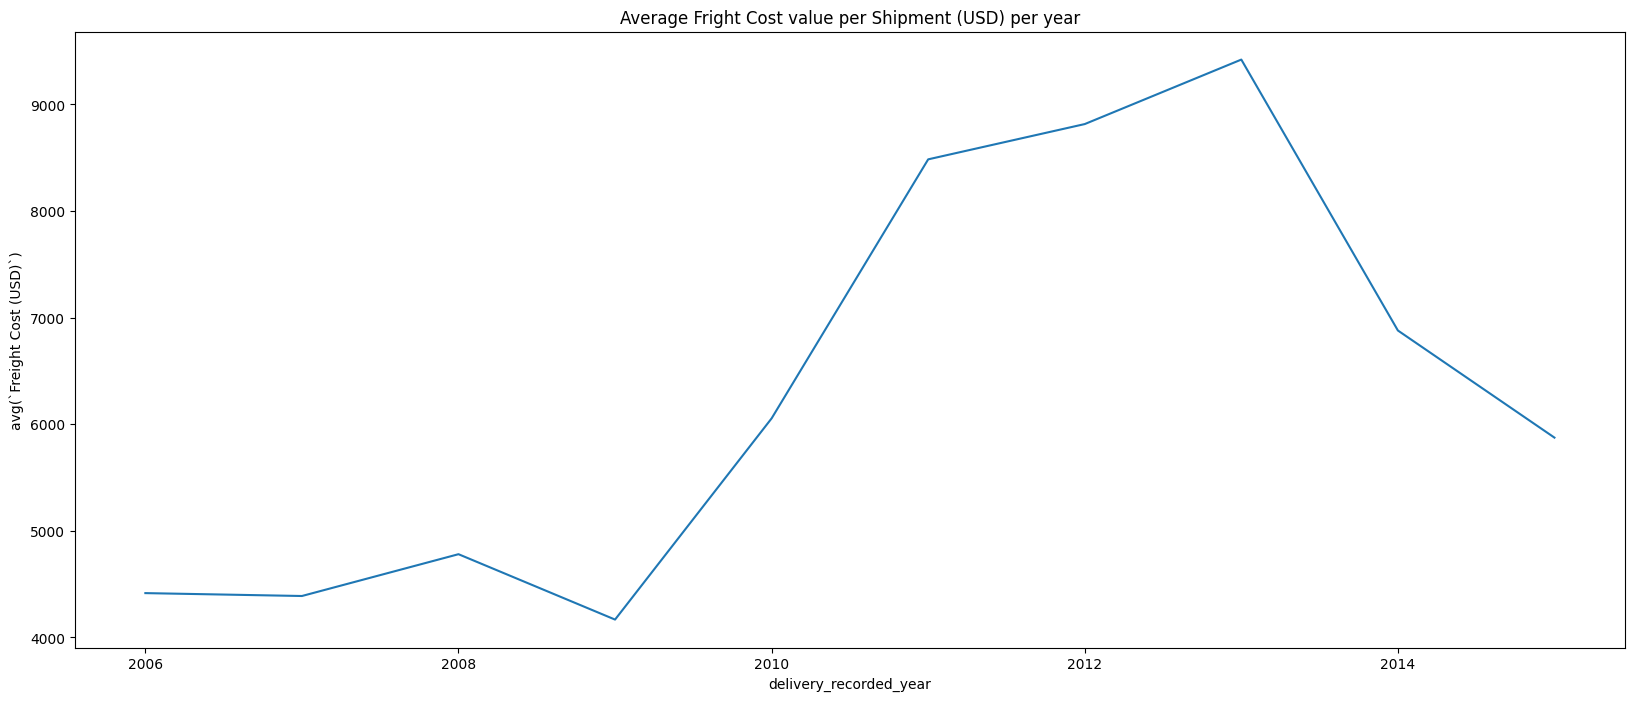

In [13]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df1['delivery_recorded_year'], y=df1['avg(`Freight Cost (USD)`)'])
plt.title("Average Fright Cost value per Shipment (USD) per year")

In [14]:
df2 = data.query("""
select delivery_recorded_year, sum(`Freight Cost (USD)`) from supply_chain group by delivery_recorded_year;
""")

In [15]:
df2

,delivery_recorded_year,sum(`Freight Cost (USD)`)
0,2006,287018.73
1,2007,2940323.56
2,2008,5301838.01
3,2009,4967509.36
4,2010,7120701.85
5,2014,11000231.68
6,2015,5927342.37
7,2012,11019916.30
8,2013,11352222.54
9,2011,8900745.01


Text(0.5, 1.0, 'Total mony earned by business per year on shipping products(USD)')

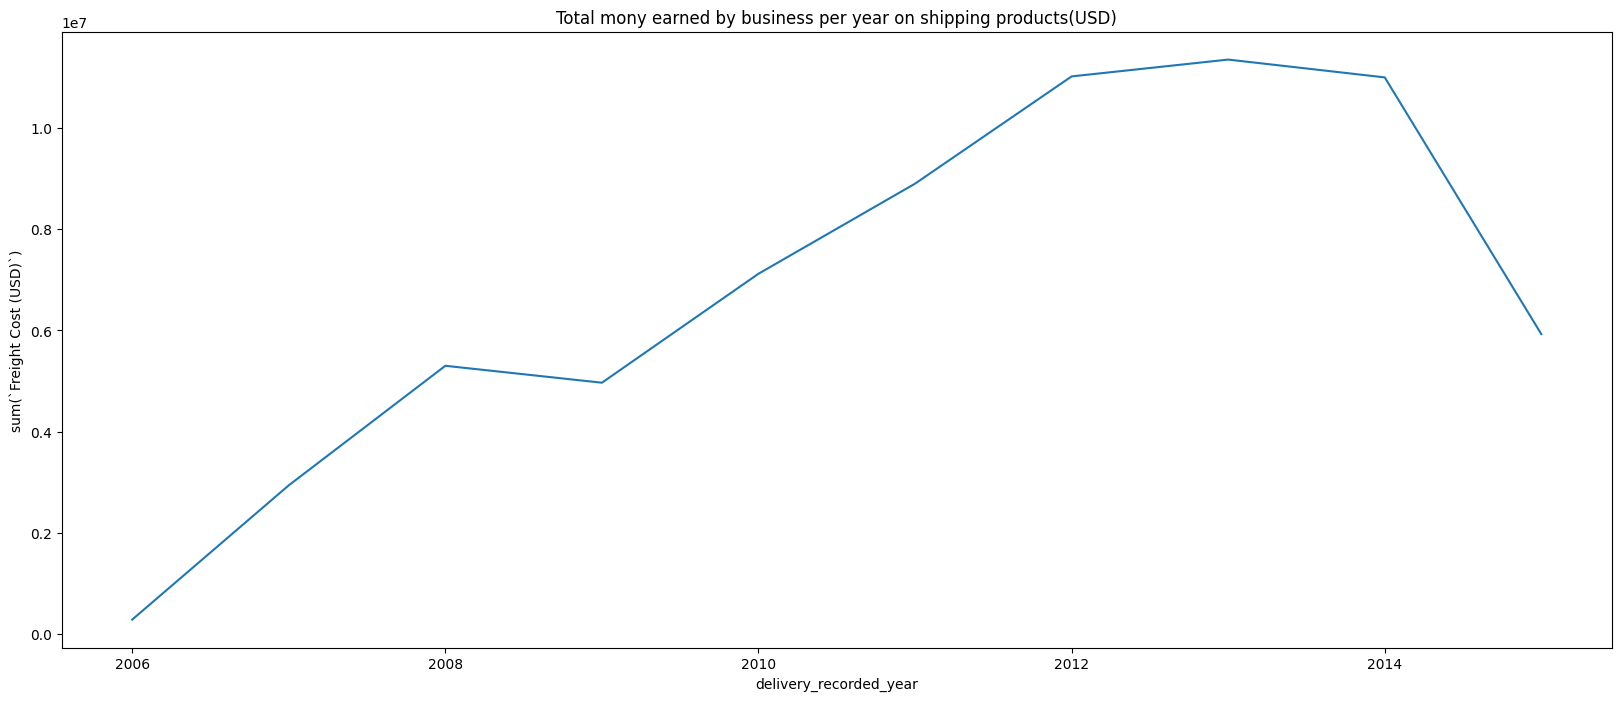

In [16]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df2['delivery_recorded_year'], y = df2['sum(`Freight Cost (USD)`)'])
plt.title("Total mony earned by business per year on shipping products(USD)")

In [20]:
df3 = data.query("""
select delivery_recorded_year, sum(`Line Item Quantity`), sum(`Line Item Value`), sum(`Freight Cost (USD)`), avg(`Freight Cost (USD)`)  from supply_chain group by delivery_recorded_year;
""")

In [21]:
df3

,delivery_recorded_year,sum(`Line Item Quantity`),sum(`Line Item Value`),sum(`Freight Cost (USD)`),avg(`Freight Cost (USD)`)
0,2006,463138,4.844512e+06,287018.73,4415.672769
1,2007,5283361,5.963144e+07,2940323.56,4388.542627
2,2008,11080677,1.135475e+08,5301838.01,4780.737610
3,2009,11413268,1.316906e+08,4967509.36,4167.373624
4,2010,20210797,1.611608e+08,7120701.85,6055.018580
5,2014,30959974,2.630043e+08,11000231.68,6879.444453
6,2015,23425363,2.046371e+08,5927342.37,5874.472121
7,2012,28863121,2.397762e+08,11019916.30,8815.933040
8,2013,25222496,2.198930e+08,11352222.54,9420.931568
9,2011,32342895,2.293991e+08,8900745.01,8484.980944


<Axes: xlabel='delivery_recorded_year', ylabel='sum(`Line Item Quantity`)'>

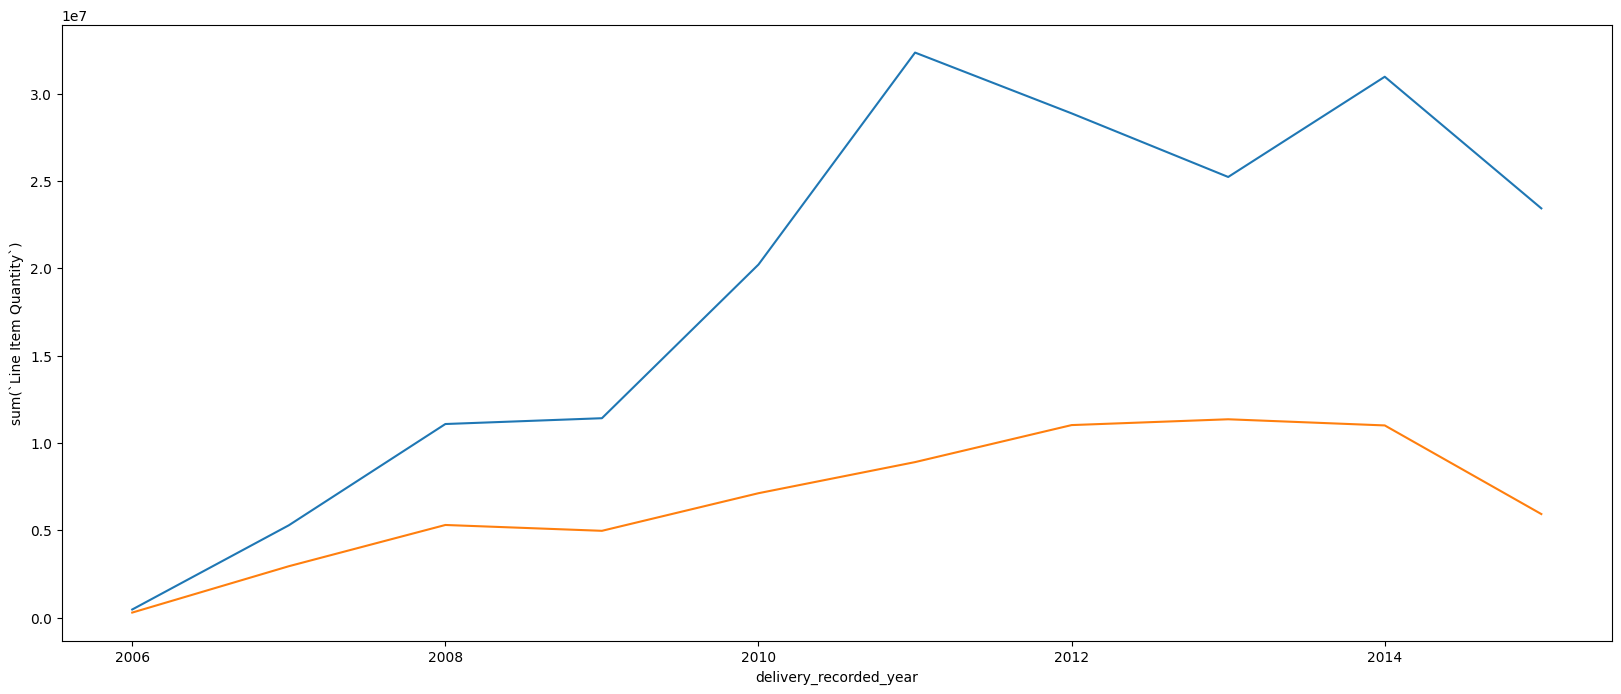

In [25]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df3['delivery_recorded_year'], y=df3['sum(`Line Item Quantity`)'])
sns.lineplot(x=df3['delivery_recorded_year'], y=df3['sum(`Freight Cost (USD)`)'])

In [26]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [28]:
data.query("""
select (`Pack Price` * `Line Item Quantity`) as CTC from supply_chain limit 5;
""")

,CTC
0,551.0
1,6200.0
2,40000.0
3,127360.8
4,121600.0


In [29]:
data.query("""
select (`Unit of Measure (Per Pack)` * `Unit Price`) as CTC from supply_chain limit 5;
""")

,CTC
0,29.1
1,7.2
2,80.0
3,4.2
4,3.0


In [32]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,actual_price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,None,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,None,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,None,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,None,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,None,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [33]:
db.execute(text("""
update supply_chain
set actual_price = (`Unit Price` * `Unit of Measure (Per Pack)`)
"""))

In [35]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,actual_price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,29.1,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,7.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,80.0,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,4.2,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,3.0,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [36]:
db.execute(text("""
commit;
"""))

In [37]:
db.execute(text("""
alter table supply_chain
add column `Discount(%)` FLOAT after actual_price;
"""))

In [40]:
db.execute(text("""
UPDATE supply_chain
SET `Discount(%)` = CASE
                        WHEN actual_price != 0 THEN ((actual_price - `Pack Price`) / actual_price) * 100
                        ELSE NULL
                    END
"""))

In [41]:
db.execute(text("""
commit;
"""))

In [42]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,actual_price,Discount(%),Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,29.1,0.343644,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,7.2,13.888900,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,80.0,0.000000,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,4.2,5.000000,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,3.0,-6.666670,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [68]:
df4 = data.query("""
SELECT
    SUM(CASE WHEN `Discount(%)` > 0 THEN 1 ELSE 0 END) AS discount,
    SUM(CASE WHEN `Discount(%)` < 0 THEN 1 ELSE 0 END) AS ValueInscreased,
    SUM(CASE WHEN `Discount(%)` = 0 THEN 1 ELSE 0 END) AS noDiscount
FROM
    supply_chain;
""")

In [69]:
df4

,discount,ValueInscreased,noDiscount
0,4465,4089,1667


In [70]:
df4.loc[0].index.to_list()

['discount', 'ValueInscreased', 'noDiscount']

In [71]:
df4.loc[0].to_list()

[Decimal('4465'), Decimal('4089'), Decimal('1667')]

([<matplotlib.patches.Wedge at 0x1c9b0cdc880>,
 [Text(0.21681648426429206, 1.0784204245799835, 'discount'),
  Text(-0.7176716452937473, -0.8336350577689052, 'ValueInscreased'),
  Text(0.9587383377023687, -0.5392780357289727, 'noDiscount')],
 [Text(0.11826353687143203, 0.5882293224981728, '43.7%'),
  Text(-0.39145726106931666, -0.45471003151031186, '40.0%'),
  Text(0.522948184201292, -0.2941516558521669, '16.3%')])

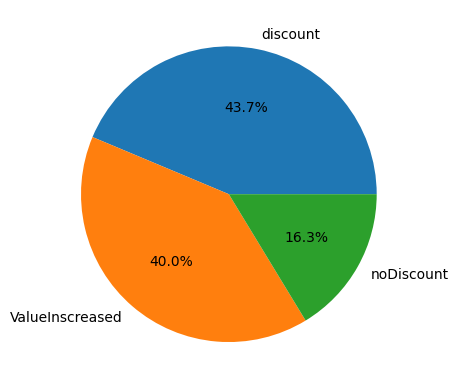

In [72]:
plt.pie(x=df4.loc[0].to_list(), labels=df4.loc[0].index.to_list(), autopct="%1.1f%%")

In [77]:
data.query("""
select if(`Discount(%)` > 0, 'Yes', 'No') as discount_flag from supply_chain limit 5;
""")

,discount_flag
0,Yes
1,Yes
2,No
3,Yes
4,No


In [79]:
db.execute(text("""
ALTER TABLE supply_chain
ADD COLUMN discount_flag VARCHAR(255) AFTER `Discount(%)`;
"""))

In [80]:
db.execute(text("""
update supply_chain
set discount_flag = if(`Discount(%)` > 0, 'Yes', 'No')
"""))

In [81]:
db.execute(text("""
commit;
"""))

In [82]:
data.query("""
select * from supply_chain limit 5;
""")

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Schedule Delivery Date New,Delivered to Client Date,Delivered to Client Date New,Delivery Recorded Date,Delivery Recorded Date New,delivery_recorded_day,delivery_recorded_month,delivery_recorded_year,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,actual_price,Discount(%),discount_flag,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2-Jun-06,2006-06-02,2,6,2006,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.00,29.1,0.343644,Yes,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14-Nov-06,2006-11-14,14,11,2006,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,7.2,13.888900,Yes,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,None
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27-Aug-06,2006-08-27,27,8,2006,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,None,Test kit,100,500,40000.0,80.00,80.0,0.000000,No,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,None
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1-Sep-06,2006-09-01,1,9,2006,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,4.2,5.000000,Yes,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,None
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11-Aug-06,2006-08-11,11,8,2006,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,3.0,-6.666670,No,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,None


In [84]:
data.query("""
select discount_flag, count(discount_flag) from supply_chain group by discount_flag; 
""")

,discount_flag,count(discount_flag)
0,Yes,4465
1,No,5859
